In [73]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [74]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [75]:
import ensembles
import networks
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [76]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#

#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,10,10]
model_params = {
    'seed':650,
    'learning_rate':0.2,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'initialisation_scheme':tf.keras.initializers.he_normal
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble


In [77]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [78]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=dataset_creation.LinearDataset, 
                                   thompson_model=thompson_model,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


In [79]:
#tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
[0 0 1 1 0 1 0 0 0 1 0 0 0 1]
[[0 0 1 1 0 1 0 0 0 1 0 0 0 1]]
0.07184073371906022
[0.07184073]
new X is in there: True
new y is in there: True
mean probability is 0.5
(2,)
(14, 2)


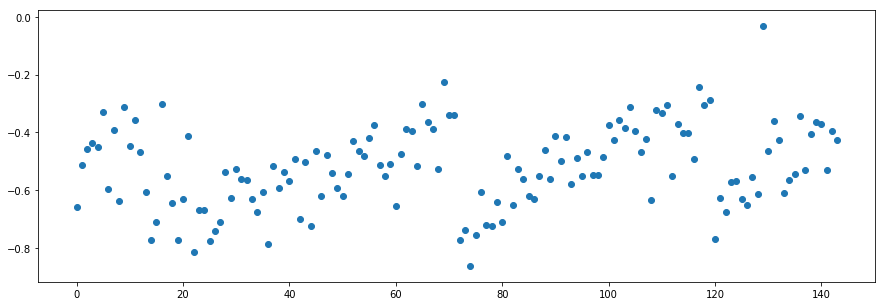

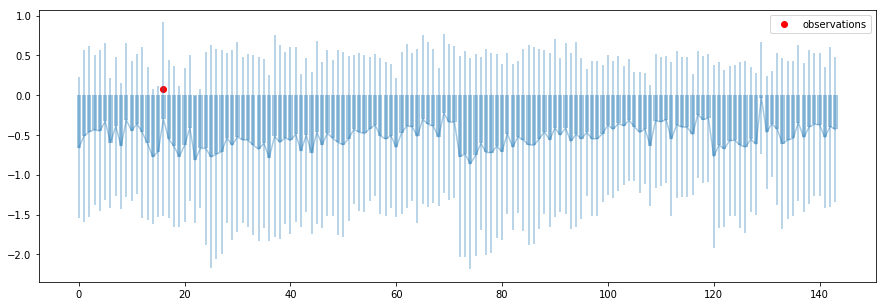

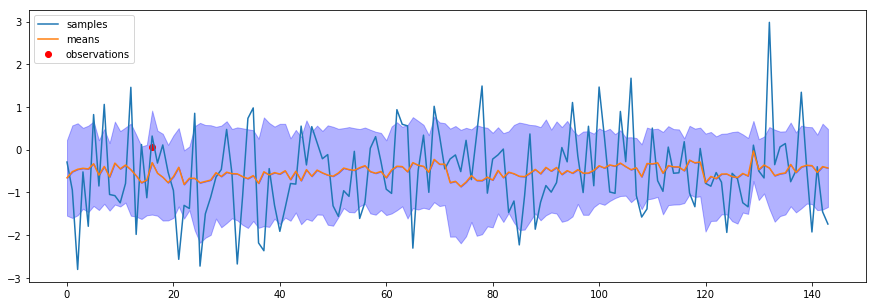

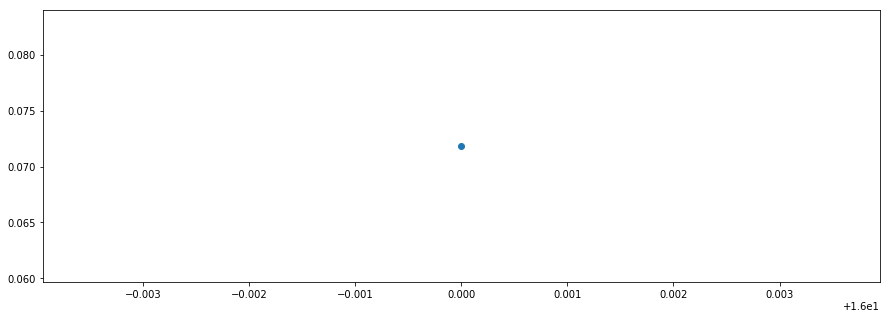

In [80]:
tg.goforit(1)
tg.plot_sample_grid()

In [81]:
a = np.array([[1,2],[3,4],[5,6]])


In [82]:
a.T[[True,False]].T

array([[1],
       [3],
       [5]])

initialising Network <class 'base.EnsembleNetwork'>
[1 0 0 0 1 1 0 1 0 0 0 1 0 0]
[[1 0 0 0 1 1 0 1 0 0 0 1 0 0]]
0.06913056623083684
[0.06913057]
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
(3,)
(14, 3)
initialising Network <class 'base.EnsembleNetwork'>
[0 1 0 1 0 1 0 0 1 0 0 0 0 1]
[[0 1 0 1 0 1 0 0 1 0 0 0 0 1]]
0.1455318379341598
[0.14553184]
new X is in there: True
new y is in there: True
mean probability is 1.0
(4,)
(14, 4)
initialising Network <class 'base.EnsembleNetwork'>
[1 0 0 0 1 0 1 1 0 0 0 1 0 0]
[[1 0 0 0 1 0 1 1 0 0 0 1 0 0]]
0.08297185269786943
[0.08297185]
new X is in there: True
new y is in there: True
mean probability is 0.6
(5,)
(14, 5)
initialising Network <class 'base.EnsembleNetwork'>
[0 1 0 1 0 0 1 0 1 0 1 0 0 0]
[[0 1 0 1 0 0 1 0 1 0 1 0 0 0]]
0.29120831128056673
[0.29120831]
new X is in there: True
new y is in there: True
mean probability is 1.0
(6,)
(14, 6)
initialising Network <class 'base.EnsembleNetwork'>
[1 0 0

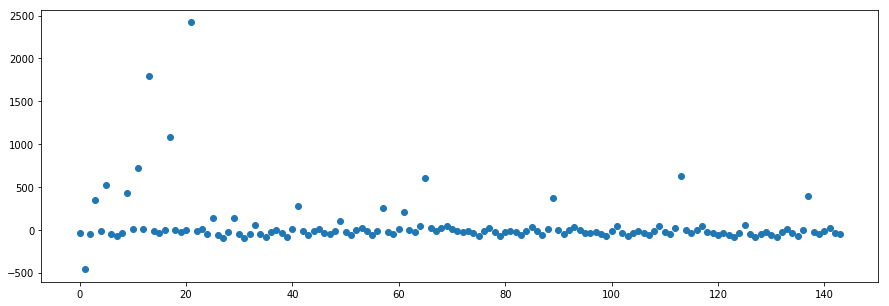

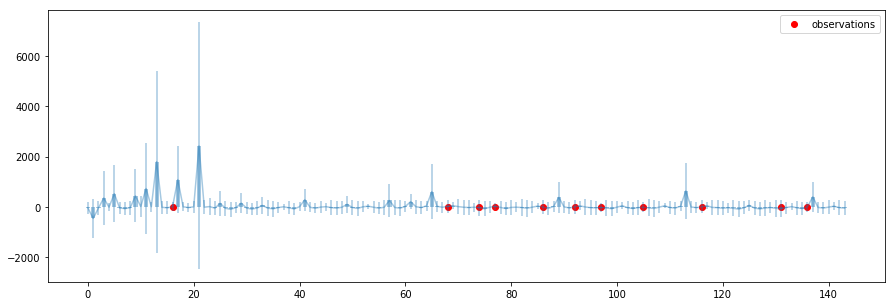

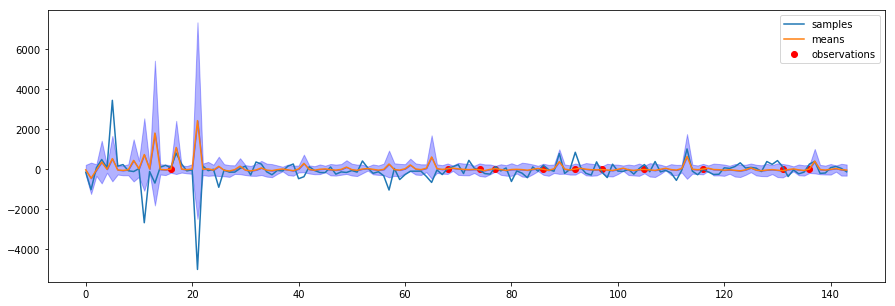

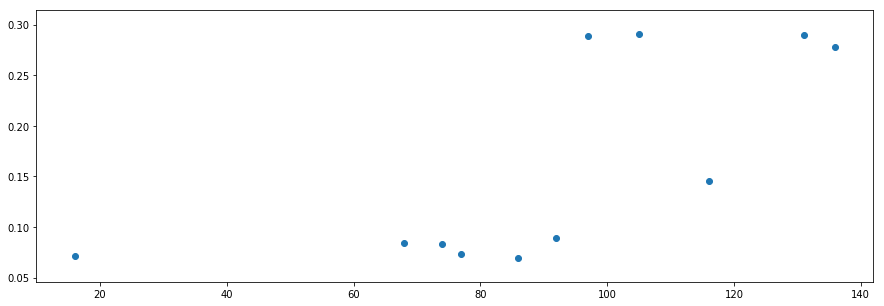

In [83]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
[0 0 1 1 0 1 0 0 1 0 1 0 0 0]
[[0 0 1 1 0 1 0 0 1 0 1 0 0 0]]
0.08301595881892156
[0.08301596]
new X is in there: True
new y is in there: True
mean probability is 0.6923076923076923
(13,)
(14, 13)
initialising Network <class 'base.EnsembleNetwork'>
[1 0 0 1 0 0 1 0 1 0 0 0 1 0]
[[1 0 0 1 0 0 1 0 1 0 0 0 1 0]]
0.20285213133882277
[0.20285213]
new X is in there: True
new y is in there: True
mean probability is 0.8571428571428571
(14,)
(14, 14)
initialising Network <class 'base.EnsembleNetwork'>
[0 1 0 1 0 0 1 1 0 0 0 0 1 0]
[[0 1 0 1 0 0 1 1 0 0 0 0 1 0]]
0.2901211840964752
[0.29012118]
new X is in there: True
new y is in there: True
mean probability is 0.7333333333333333
(15,)
(14, 15)
initialising Network <class 'base.EnsembleNetwork'>
[0 0 1 0 1 1 0 0 0 1 1 0 0 0]
[[0 0 1 0 1 1 0 0 0 1 1 0 0 0]]
0.07040840002109794
[0.0704084]
new X is in there: True
new y is in there: True
mean probability is 0.8125
(16,)
(14, 16)
initialising Netwo

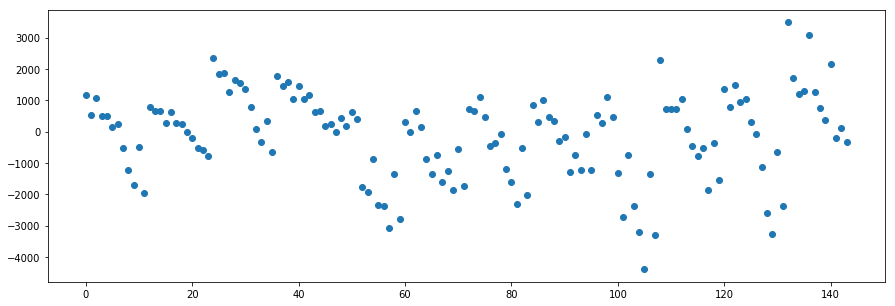

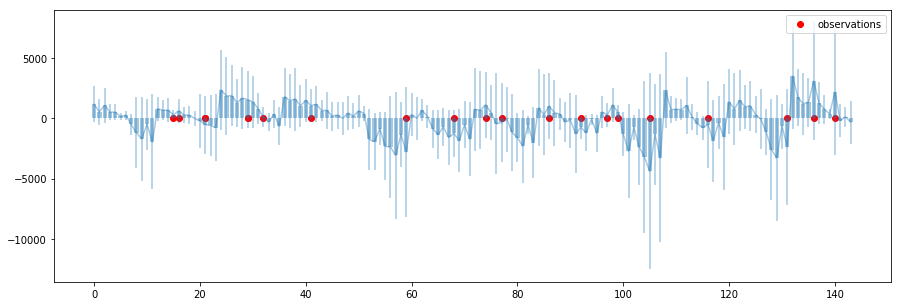

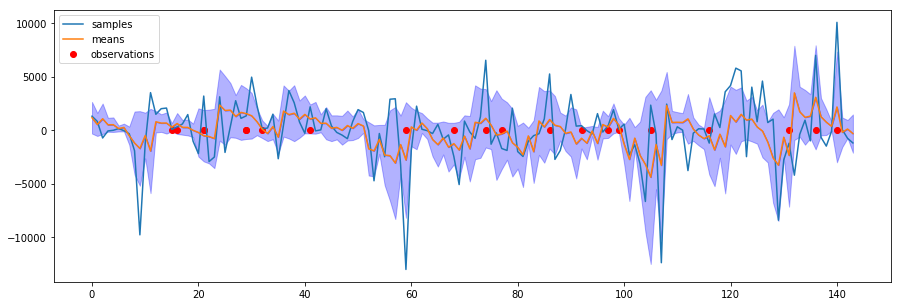

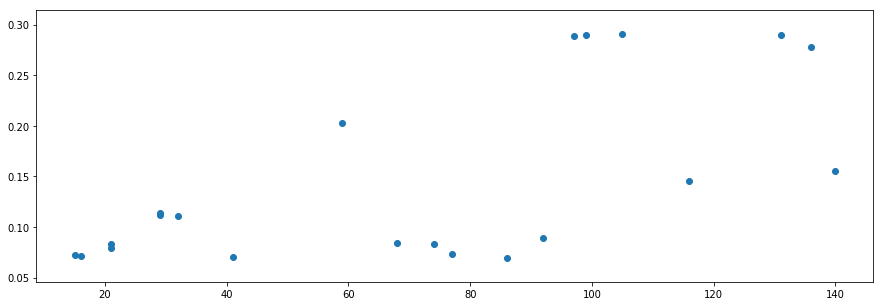

In [84]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>


In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()